In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
OUTPUT_PATH = f'{STUD_PATH}stud5/output/'

In [2]:
# Example of reading mutlipe files into one matrix. Adjust for h5ad reading.
# See more at: https://github.com/theislab/scanpy/issues/267

filenames = ['liver_sample_35.h5ad', 
             'liver_sample_37.h5ad', 
             'liver_sample_40.h5ad', 
             'liver_sample_43.h5ad',
             'liver_sample_46.h5ad',
             'liver_sample_7.h5ad',
             'liver_sample_9.h5ad']

adatas = [ad.read(f'{DATA_PATH}catlas_objects/{filename}') for filename in filenames]
adata = adatas[0].concatenate(adatas[1:])

In [3]:
#INPUT_PATH = f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad'
#TISSUE = INPUT_PATH.split('/')[-1].replace('.h5ad', '')
#TSV_OUT = f"{OUTPUT_PATH}clusters_{TISSUE}.tsv"

In [4]:
#adata = ad.read(INPUT_PATH)
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
#epi.pp.filter_features(adata, min_counts=1)
adata

AnnData object with n_obs × n_vars = 194628 × 1151968
    obs: 'batch', 'nb_features'
    var: 'n_cells'

In [5]:
epi.pp.binarize(adata)
adata.layers['binary'] = adata.X.copy()

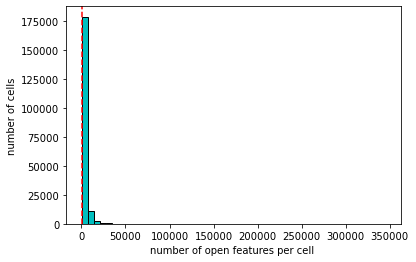

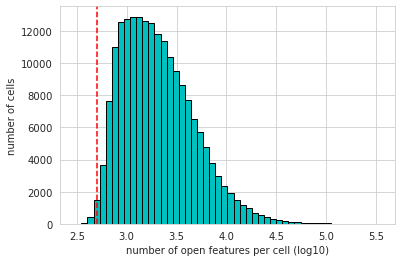

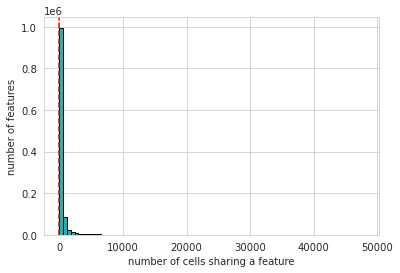

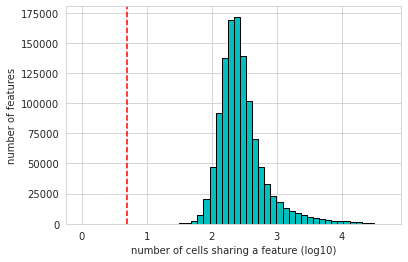

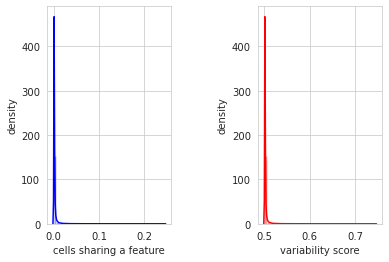

In [6]:
min_features = 500

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

min_cells = 5

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

In [7]:
#min_score_value = 0.505
#nb_feature_selected = 120000
#epi.pl.variability_features(adata,log=None, min_score=min_score_value, nb_features=nb_feature_selected)

#epi.pl.variability_features(adata,log='log10', min_score=min_score_value, nb_features=nb_feature_selected)

In [8]:
adata.raw = adata

In [9]:
#adata = epi.pp.select_var_feature(adata,
#                                  nb_features=nb_feature_selected,
#                                  show=False,
#                                  copy=True)

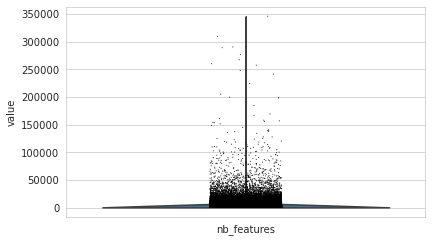

In [10]:
epi.pl.violin(adata, ['nb_features'])

In [11]:
epi.pp.filter_cells(adata, min_features=10)
epi.pp.filter_cells(adata, max_features=10000)

In [12]:
epi.pp.filter_features(adata, min_cells=1)
epi.pp.filter_features(adata, max_cells=150)

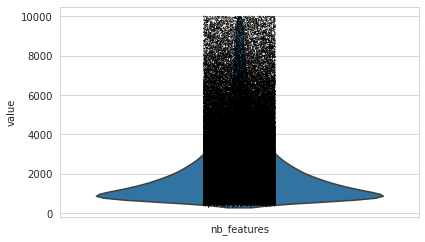

In [13]:
epi.pl.violin(adata, ['nb_features'])

In [14]:
epi.pp.normalize_total(adata)
adata.layers['normalised'] = adata.X.copy()
epi.pp.log1p(adata)

In [15]:
#adata.write_h5ad(f'{OUTPUT_PATH}complete_liver_clpp17.h5ad') # min_feat=10, max_feat=10000, min_cells=1, max_cells=150
#adata.write_h5ad(f'{OUTPUT_PATH}complete_liver_clpp17_mc10.h5ad') # min_cells=10
adata.write_h5ad(f'{OUTPUT_PATH}complete_liver_clpp17_Z9a.h5ad') # Zelle 8-9 auskommentiert, Zelle 7 nicht

In [16]:
adata

AnnData object with n_obs × n_vars = 185734 × 503863
    obs: 'batch', 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'log1p'
    layers: 'binary', 'normalised'

In [17]:
adata.raw

In [20]:
adata.var

,n_cells,commonness,prop_shared_cells,variability_score
index,,,,
chr1:79215-79615,24,44.0,0.000226,0.500226
chr1:102755-103155,106,158.0,0.000812,0.500812
chr1:276109-276509,15,20.0,0.000103,0.500103
chr1:631178-631578,125,188.0,0.000966,0.500966
chr1:794897-795297,63,87.0,0.000447,0.500447
...,...,...,...,...
chrY:20699407-20699807,93,117.0,0.000601,0.500601
chrY:20828004-20828404,50,72.0,0.000370,0.500370
chrY:20828469-20828869,41,62.0,0.000319,0.500319
